In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Titanic-Dataset.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#now we will work on data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df = df.drop(columns=['Cabin', 'Ticket', 'Name'])

In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Ayush Malik\AppData\Local\Temp\ipykernel_2488\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Ayush Malik\AppData\Local\Temp\ipykernel_2488\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [14]:
#now data got cleaned 
#lets do some statistics

In [15]:
#survival count
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [38]:
#survival rate by gender
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
#average age by class
df.groupby('Pclass')['Age'].mean()


Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64

In [40]:
#family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].head()


0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

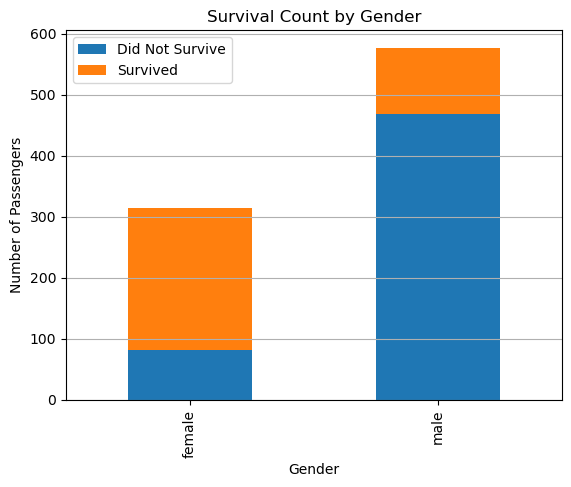

In [ ]:
#survival cont by gender
import matplotlib.pyplot as plt

survival_gender = df.groupby('Sex')['Survived'].value_counts().unstack()

survival_gender.plot(kind='bar', stacked=True)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(['Did Not Survive', 'Survived'])
plt.grid(axis='y')
plt.show()


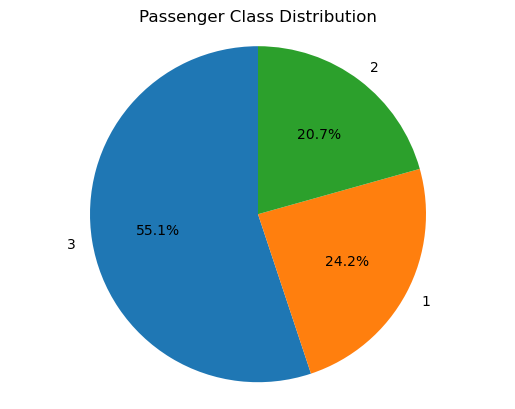

In [22]:
#class distribution in percentage
pclass_counts = df['Pclass'].value_counts()

plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Passenger Class Distribution")
plt.axis('equal')
plt.show()



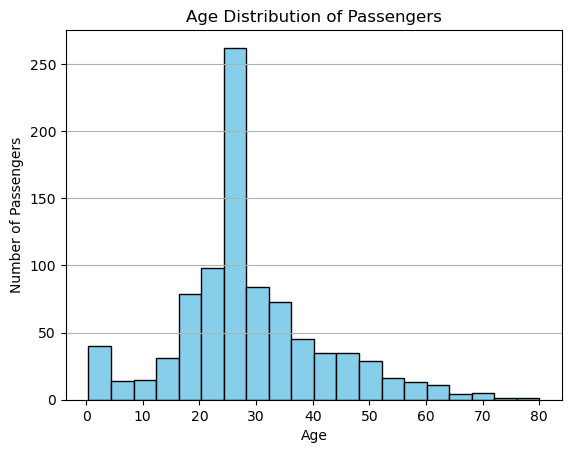

In [27]:
#age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.grid(axis='y')
plt.show()


C:\Users\Ayush Malik\AppData\Local\Temp\ipykernel_2488\1761751480.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fare_by_class, labels=sorted(df['Pclass'].unique()))


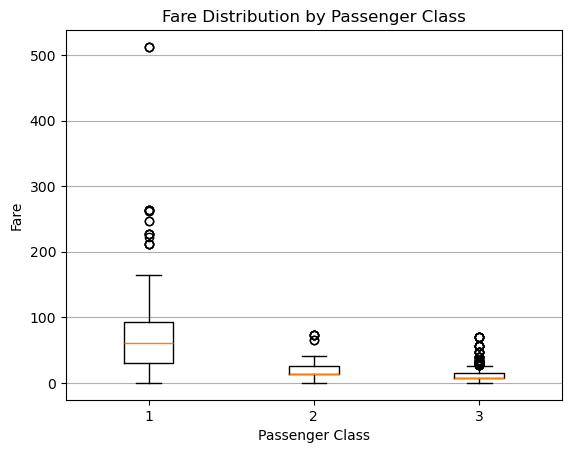

In [28]:
#fare by class

fare_by_class = [df[df['Pclass'] == cls]['Fare'] for cls in sorted(df['Pclass'].unique())]

plt.boxplot(fare_by_class, labels=sorted(df['Pclass'].unique()))
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.grid(axis='y')
plt.show()


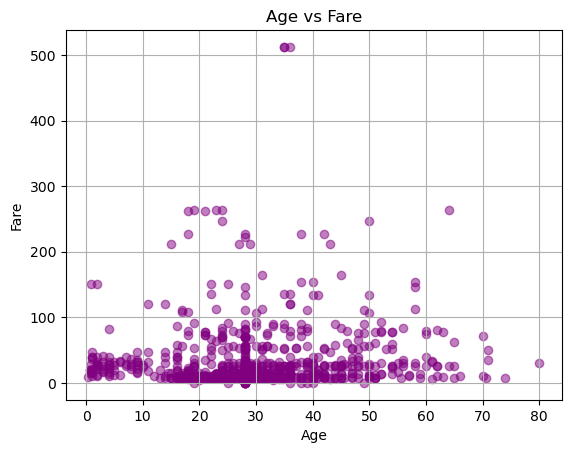

In [33]:
#age vs fare analysis
plt.scatter(df['Age'], df['Fare'], alpha=0.5, c='purple')
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()
